# Project 1: Remote Work Effect on Mental Health
In this project, I'll be applying what I've learned on data preparation, exploration, cleaning, and visualization.

## Initial Exploration


----------| Datatypes |----------
Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

----------| Rows |----------
5000

----------| Columns |----------
20


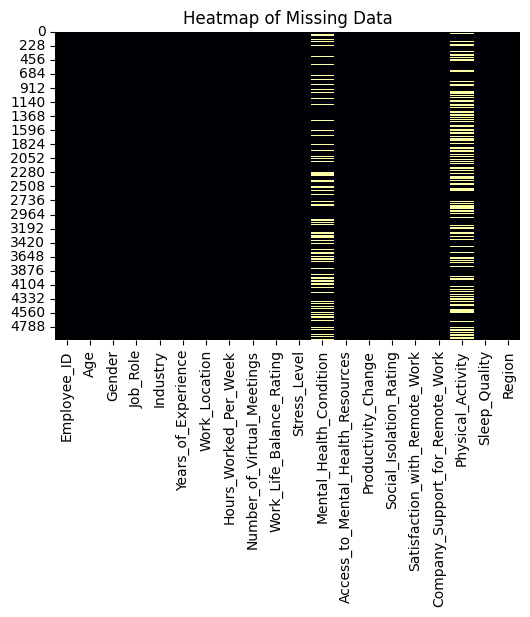

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# for formatting
headline1 = "\n----------|"
headline2 = "|----------\n"

data = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# to print datatypes
print(f"{headline1} Datatypes {headline2}{data.dtypes}")

# # of rows
print(f"{headline1} Rows {headline2}{len(data.axes[0])}")

# # of columns
print(f"{headline1} Columns {headline2}{len(data.axes[1])}")

# # of missing values
print(f"{headline1} Missing Data Count {headline2}{data.isnull().sum()}")

# heatmap of missing values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

In [11]:
# display first few rows, in its own codeblock to accomodate a Jupyter formatting issue
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## Summary Statistics

In [12]:
# for loop to go through each column and display numerical statistics or categorical statistics
for column in data.columns:
    if data[column].dtype == 'int64':
        print(f"{headline1} {column} {headline2}")
        print(f"median: {data[column].median()}") # median added to .describe since it was specified in project instructions
        print(data[column].describe())
    else:
        print(f"{headline1} {column} {headline2}")
        print(data[column].value_counts())
    




----------| Employee_ID |----------

Employee_ID
EMP5000    1
EMP0001    1
EMP0002    1
EMP0003    1
EMP0004    1
          ..
EMP0012    1
EMP0013    1
EMP0014    1
EMP0015    1
EMP0016    1
Name: count, Length: 5000, dtype: int64

----------| Age |----------

median: 41.0
count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

----------| Gender |----------

Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64

----------| Job_Role |----------

Job_Role
Project Manager      738
Sales                733
Designer             723
HR                   716
Software Engineer    711
Data Scientist       696
Marketing            683
Name: count, dtype: int64

----------| Industry |----------

Industry
Finance          747
IT               746
Healthcare       728
Retail  

## Handling Missing Data
Two columns in the dataset contain missing data, `Mental_Health_Condition` and `Physical_Activity`.
I'll be using imputation to fill these missing values since there are 2,825 missing values and removal would mean losing half my dataset.
These are both string columns, so to fill them, I'll be using their column's mode values.


----------| Mental Health Condition Mode |----------
Burnout

----------| Physical Activity Mode |----------
Weekly


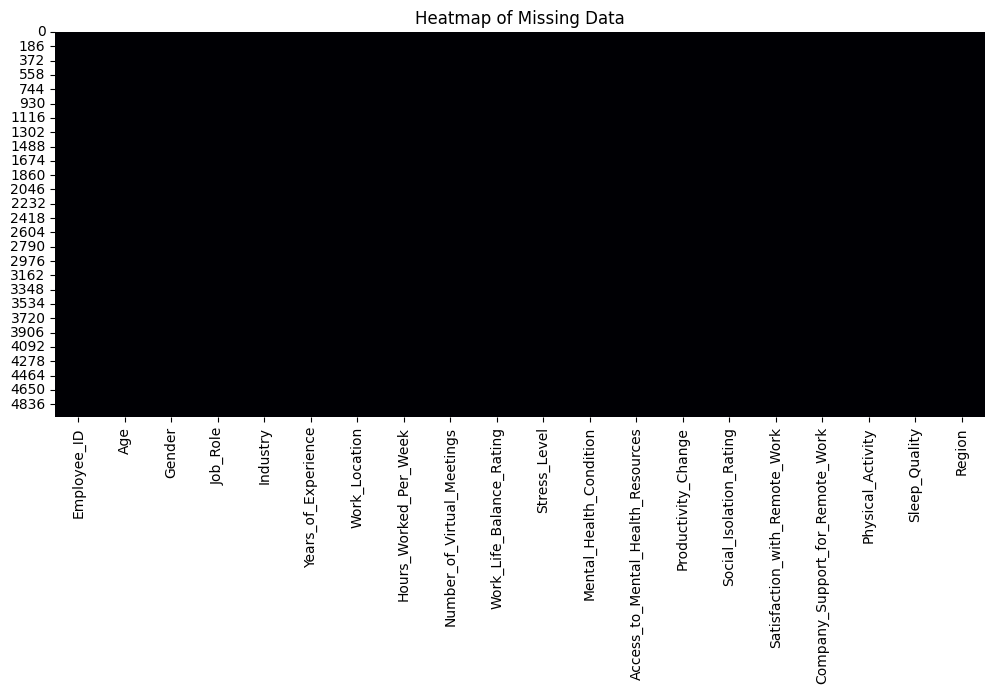

In [54]:
# printing modes of both categorical columns
print(f"{headline1} Mental Health Condition Mode {headline2}{data['Mental_Health_Condition'].mode()[0]}")
print(f"{headline1} Physical Activity Mode {headline2}{data['Physical_Activity'].mode()[0]}")

filled_data = data.copy()

# old format, soon to be deprecated
# filled_data['Mental_Health_Condition'].fillna(data['Mental_Health_Condition'].mode()[0], inplace=True)
# filled_data['Physical_Activity'].fillna(data['Physical_Activity'].mode()[0], inplace=True)

# new format
filled_data['Mental_Health_Condition'] = filled_data['Mental_Health_Condition'].fillna(data['Mental_Health_Condition'].mode()[0])
filled_data['Physical_Activity'] = filled_data['Physical_Activity'].fillna(data['Physical_Activity'].mode()[0])

# heatmap to confirm values are filled
plt.figure(figsize=(6,4))
sns.heatmap(filled_data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()



## Outlier Detection
I'll be using a box plot for each numerical column to find evidence of outliers.

As you can see below, none of the numerical columns have outliers, so there is no need to describe and perform an outlier removal strategy.

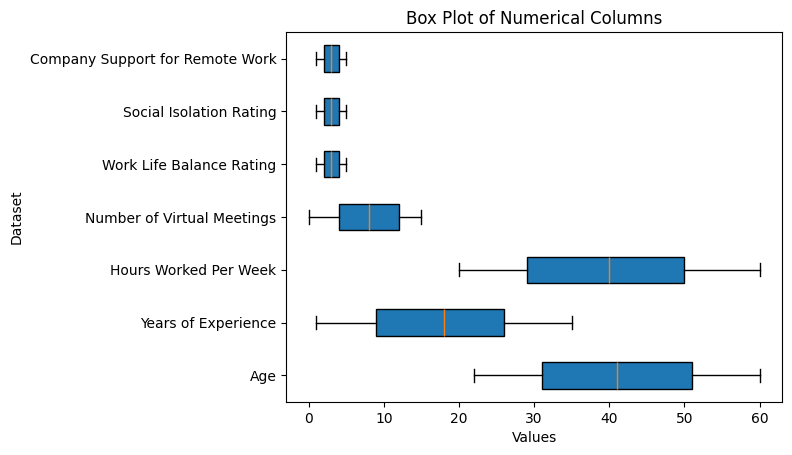

In [76]:
# box plot of each numerical column to find outliers
plt.boxplot([
    filled_data['Age'],
    filled_data['Years_of_Experience'],
    filled_data['Hours_Worked_Per_Week'],
    filled_data['Number_of_Virtual_Meetings'],
    filled_data['Work_Life_Balance_Rating'],
    filled_data['Social_Isolation_Rating'],
    filled_data['Company_Support_for_Remote_Work']],
    patch_artist=True, vert=False)
plt.gca().set_yticklabels(['Age',
                           'Years of Experience',
                           'Hours Worked Per Week',
                           'Number of Virtual Meetings',
                           'Work Life Balance Rating',
                           'Social Isolation Rating',
                           'Company Support for Remote Work'])

# figure details
plt.title('Box Plot of Numerical Columns')
plt.ylabel('Dataset')
plt.xlabel('Values')
plt.show()

## Data Visualization